In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [7]:
# View all of the classes that automap found


In [22]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

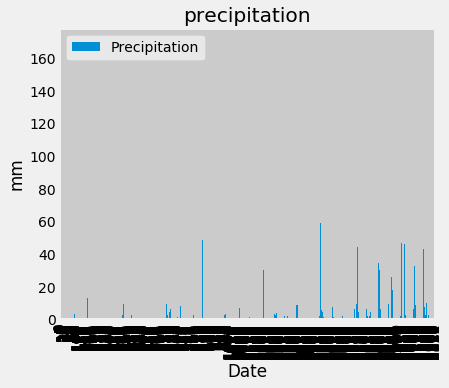

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#####################

x = dt.datetime(2017, 8, 23)

# Calculate the date one year from the last date in data set.

y = x - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

query_result = session.query(Measurement.date, Measurement.prcp).filter((Measurement.date >= y) & (Measurement.date <= x)).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(query_result, columns=['date', 'Precipitation'])
df.set_index('date')
# Sort the dataframe by date

df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(kind="bar", figsize=(6,5))

# Set a title for the chart
plt.title("precipitation")
plt.xlabel("Date")
plt.ylabel("mm")

plt.show()
# plt.tight_layout()


In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,Precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [28]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()


[('USC00519281', 12.2, 29.4, 22.03582251082252)]

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.date).filter(Measurement.station == "USC00519281").order_by(Measurement.date.desc()).first()

x = dt.datetime(2017, 8, 18)

# Calculate the date one year from the last date in data set.

y = x - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

query_result_tobs = session.query(Measurement.date, Measurement.tobs).filter((Measurement.date >= y) & (Measurement.date <= x)).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

df_tobs = pd.DataFrame(query_result_tobs, columns=['date', 'temperature'])
df_tobs.set_index('date')
# Sort the dataframe by date

df_tobs.sort_values(by=['date'])

df_tobs


,date,temperature
0,2016-08-19,25.0
1,2016-08-20,26.7
2,2016-08-21,24.4
3,2016-08-22,25.0
4,2016-08-23,27.2
...,...,...
2231,2017-08-14,26.1
2232,2017-08-15,21.1
2233,2017-08-16,21.7
2234,2017-08-17,22.2


# Close session

In [31]:
# Close Session
session.close()